<a href="https://colab.research.google.com/github/Loijz/Loijz/blob/main/boombox_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boombox exercise

In [ ]:
!pip install linearmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from linearmodels.panel import PanelOLS

# Set up modern styling
sns.set_theme(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Load and prepare data

#file_path = 'https://www.dropbox.com/scl/fi/6hvfnl04zwik484zm3n2r/boombox.csv?rlkey=kxyggs1y03d56g5q7qd3pdknj&dl=1'
file_path = 'https://www.dropbox.com/scl/fi/g4krz1pi4lnrmy616pu0q/boombox_start.csv?rlkey=pwdiqs5bemkpvksv2fsxjisgk&dl=1'

# Load the data
try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin-1')

df.head()

,country,week,curators,ib_curators,artists,ib_artists
0,afghanistan,2019w23,0,0,0,0
1,afghanistan,2019w33,0,0,0,0
2,afghanistan,2019w41,0,0,0,0
3,afghanistan,2019w42,0,0,0,0
4,afghanistan,2019w45,0,0,0,0


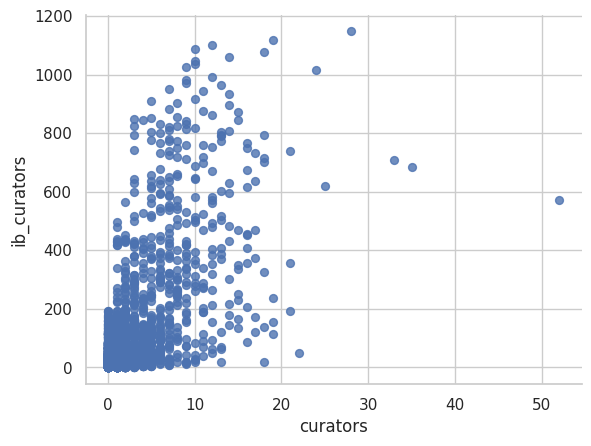

In [ ]:
# @title curators vs ib_curators

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='curators', y='ib_curators', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Convert week format (2019w33) to datetime
def convert_week_to_date(week_str):
    year = int(week_str[:4])
    week_num = int(week_str[5:])
    return pd.to_datetime(f"{year}-01-01") + pd.Timedelta(weeks=week_num-1)

# Apply conversion and create additional time-related columns
df['date'] = df['week'].apply(convert_week_to_date)
df['year'] = df['date'].dt.year
df['week_num'] = df['date'].dt.isocalendar().week

# Sort the dataframe by date
df = df.sort_values('date')

# Create a numeric week column for plotting
df['week_numeric'] = range(len(df))

df.head()


,country,week,curators,ib_curators,artists,ib_artists,date,year,week_num,week_numeric
0,afghanistan,2019w23,0,0,0,0,2019-06-04,2019,23,0
17280,singapore,2019w23,0,0,0,0,2019-06-04,2019,23,1
3840,chad,2019w23,0,0,0,0,2019-06-04,2019,23,2
17400,slovakia,2019w23,0,0,0,0,2019-06-04,2019,23,3
3720,centralafrica,2019w23,0,0,0,0,2019-06-04,2019,23,4


In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {len(df)}")
print(f"Number of unique countries: {df['country'].nunique()}")
print(f"Date range: from {df['date'].min()} to {df['date'].max()}")
df.describe()

Dataset Overview:
Number of rows: 21240
Number of unique countries: 177
Date range: from 2019-06-04 00:00:00 to 2022-06-25 00:00:00


,curators,ib_curators,artists,ib_artists,date,year,week_num,week_numeric
count,21240.000000,21240.000000,21240.000000,21240.000000,21240,21240.000000,21240.0,21240.000000
mean,0.271516,12.708004,2.457627,47.829944,2021-04-19 00:23:59.999999744,2020.808333,26.7,10619.500000
min,0.000000,0.000000,0.000000,0.000000,2019-06-04 00:00:00,2019.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2020-10-05 06:00:00,2020.000000,14.0,5309.750000
50%,0.000000,0.000000,0.000000,0.000000,2021-05-03 12:00:00,2021.000000,26.0,10619.500000
75%,0.000000,2.000000,0.000000,3.000000,2021-11-27 18:00:00,2021.000000,40.25,15929.250000
max,52.000000,1147.000000,783.000000,14090.000000,2022-06-25 00:00:00,2022.000000,53.0,21239.000000
std,1.474474,68.856025,23.402460,479.825108,NaN,0.839621,15.111389,6131.604195


In [ ]:
# Run linear regressions: direct network effects
# Artists linear model
artists_model = ols('artists ~  ib_artists', data=df).fit()
print("Linear Regression Results - Artists Model:")
print(artists_model.summary())

# Curators linear model
curators_model = ols('curators ~ ib_curators', data=df).fit()
print("\nLinear Regression Results - Curators Model:")
print(curators_model.summary())

Linear Regression Results - Artists Model:
                            OLS Regression Results                            
Dep. Variable:                artists   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.215e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:53:47   Log-Likelihood:                -76870.
No. Observations:               21240   AIC:                         1.537e+05
Df Residuals:                   21238   BIC:                         1.538e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

In [ ]:
# Run linear regressions: cross-side network effects
# Artists linear model
artists_model = ols('artists ~  ib_artists + ib_curators', data=df).fit()
print("Linear Regression Results - Artists Model:")
print(artists_model.summary())

# Curators linear model
curators_model = ols('curators ~ ib_artists + ib_curators', data=df).fit()
print("\nLinear Regression Results - Curators Model:")
print(curators_model.summary())

Linear Regression Results - Artists Model:
                            OLS Regression Results                            
Dep. Variable:                artists   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.323e+04
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:53:47   Log-Likelihood:                -76508.
No. Observations:               21240   AIC:                         1.530e+05
Df Residuals:                   21237   BIC:                         1.530e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Interce

In [ ]:
# Curators linear model
curators_model = ols('curators ~ ib_artists + ib_artists^2 + ib_curators', data=df).fit()
print("\nLinear Regression Results - Curators Model:")
print(curators_model.summary())


Linear Regression Results - Curators Model:
                            OLS Regression Results                            
Dep. Variable:               curators   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     8312.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:53:47   Log-Likelihood:                -30137.
No. Observations:               21240   AIC:                         6.028e+04
Df Residuals:                   21236   BIC:                         6.031e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ib_artists_earned'], label='ib artists earned')
plt.plot(df['date'], df['ib_curators_earned'], label='ib curators earned')

KeyError: 'ib_artists_earned'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels import PanelOLS

def analyze_direct_network_effects(df):
    """
    Analyze direct network effects for both artists and curators
    """
    # Test for direct network effects
    artist_model = OLS(df['artists'],
                      sm.add_constant(df['ib_artists'])).fit()

    curator_model = OLS(df['curators'],
                       sm.add_constant(df['ib_curators'])).fit()

    # Test for hump shape
    artist_quad = sm.add_constant(pd.DataFrame({
        'ib_artists': df['ib_artists'],
        'ib_artists2': df['ib_artists']**2
    }))

    curator_quad = sm.add_constant(pd.DataFrame({
        'ib_curators': df['ib_curators'],
        'ib_curators2': df['ib_curators']**2
    }))

    artist_hump = OLS(df['artists'], artist_quad).fit()
    curator_hump = OLS(df['curators'], curator_quad).fit()

    return {
        'direct_artist': artist_model,
        'direct_curator': curator_model,
        'hump_artist': artist_hump,
        'hump_curator': curator_hump
    }

def analyze_cross_platform_effects(df):
    """
    Analyze cross-platform network effects between artists and curators
    """
    # Add small constant for log transform
    epsilon = 1

    # Create log variables
    for var in ['artists', 'curators', 'ib_artists', 'ib_curators']:
        df[f'log_{var}'] = np.log(df[var] + epsilon)

    # Set up panel data
    df = df.set_index(['country', 'date'])

    # Estimate panel models with fixed effects
    artist_model = PanelOLS(
        dependent=df['log_artists'],
        exog=df[['log_ib_artists', 'log_ib_curators']],
        entity_effects=True,
        time_effects=True
    ).fit()

    curator_model = PanelOLS(
        dependent=df['log_curators'],
        exog=df[['log_ib_curators', 'log_ib_artists']],
        entity_effects=True,
        time_effects=True
    ).fit()

    return {
        'cross_artist': artist_model,
        'cross_curator': curator_model
    }

def plot_predicted_values(df, model, actual_col, title):
    """
    Plot actual vs predicted values
    """
    # Get predictions
    df['yhat'] = model.predict(df)

    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(df.index.get_level_values('date').unique(),
             df.groupby('date')[actual_col].mean(),
             label='Actual')
    plt.plot(df.index.get_level_values('date').unique(),
             df.groupby('date')['yhat'].mean(),
             label='Predicted')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    return plt.gcf()

# Run full analysis
def main(df):
    # Direct network effects
    direct_effects = analyze_direct_network_effects(df)

    # Cross-platform effects
    cross_effects = analyze_cross_platform_effects(df)

    # Plots
    artist_plot = plot_predicted_values(
        df,
        cross_effects['cross_artist'],
        'log_artists',
        'Artist Growth - Actual vs Predicted'
    )

    curator_plot = plot_predicted_values(
        df,
        cross_effects['cross_curator'],
        'log_curators',
        'Curator Growth - Actual vs Predicted'
    )

    return {
        'direct_effects': direct_effects,
        'cross_effects': cross_effects,
        'plots': {
            'artist': artist_plot,
            'curator': curator_plot
        }
    }

In [ ]:
# Import necessary libraries
import statsmodels.api as sm
from linearmodels import PanelOLS

# Run the analysis
results = main(df)

# View results
print(results['direct_effects']['direct_artist'].summary())
print(results['cross_effects']['cross_artist'].summary())

# Display plots
plt.show()